Enter the web address to get the essential words https://baginskistomatologia.pl/
How many essential words to print? 8


['sprawdź' 'lek' 'dent' 'stom' 'hig' 'stomatologicznej' 'specjalista'
 'państwa']


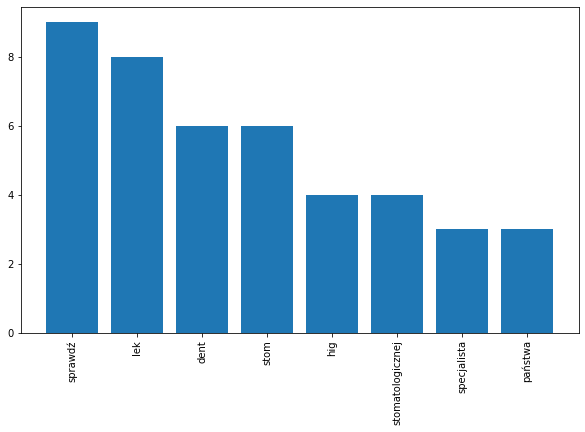

In [3]:
import nltk
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import string
from urllib.request import urlopen
import matplotlib.pyplot as plt
%matplotlib inline

htmls = input('Enter the web address to get the essential words'),

def parse(url):        
    x = urlopen(url).read()
    x = BeautifulSoup(x, 'lxml').find_all("p")
    return(x)

articles = [parse(url) for url in htmls]
articles = [" ".join([str(paragraph) for paragraph in article]) for article in articles]
articles = [re.sub('<.+?>', ' ', a) for a in articles]
articles = [re.sub('{.+?}', ' ', a) for a in articles]
articles = [re.sub('\n', ' ', a) for a in articles]
articles = [re.sub('\t', ' ', a) for a in articles]
articles = [a.lower() for a in articles]
#nltk.download()
articles = [nltk.word_tokenize(a) for a in articles]

stopwords_polish = ['część','głównie', 'wyjątkiem','niekiedy','ich', 'brak', 'ponadto','.', '–', 'a', 'aby', 'ach', 'acz', 'adres', 'aczkolwiek', 'aj', 'albo', 'ale', 'alez', 'ależ', 'ani', 'az', 'aż', 'bardziej', 'bardzo', 'beda', 'bedzie', 'bez', 'deda', 'będą', 'bede', 'będę', 'będzie', 'będziemy', 'bo', 'bowiem', 'by', 'byc', 'być', 'byl', 'byla', 'byli', 'byliśmy', 'bylibyśmy', 'bylo', 'byly', 'był', 'była', 'było', 'były', 'bym', 'bynajmniej', 'cala', 'cali', 'caly', 'cała', 'cały', 'ci', 'cie', 'ciebie', 'cię', 'co', 'cokolwiek', 'cos', 'coś', 'czasami', 'czasem', 'czemu', 'czy', 'czyli', 'daleko', 'dla', 'dlaczego', 'dlatego', 'do', 'dobrze', 'dokad', 'dokąd', 'dosc', 'dość', 'duzo', 'duży', 'duże', 'duża', 'dużo', 'dwa', 'dwaj', 'dwie', 'dwoje', 'dwóch', 'dwoch', 'dzis', 'dzisiaj', 'dziś', 'email', 'e-mail', 'gdy', 'gdyby', 'gdybym', 'gdybyś', 'gdyz', 'gdyż', 'gdzie', 'gdziekolwiek', 'gdzies', 'gdzieś', 'go', 'i', 'ii', 'iii', 'iv', 'v', 'vi', 'vii', 'viii', 'ix', 'x', 'xx', 'xxi', 'ile', 'im', 'imię', 'inna', 'inne', 'inny', 'innych', 'iz', 'iż', 'ja', 'jak', 'jakas', 'jakaś', 'jakby', 'jaki', 'jakichs', 'jakichś', 'jakie', 'jakis', 'jakiś', 'jakiz', 'jakiż', 'jakkolwiek', 'jako', 'jakos', 'jakoś', 'ją', 'je', 'jeden', 'jedna', 'jednak', 'jednakze', 'jednakże', 'jedno', 'jego', 'jej', 'jemu', 'jesli', 'jest', 'jestem', 'jesteś', 'jeszcze', 'jeśli', 'jezeli', 'jeżeli', 'juz', 'już', 'kazdy', 'każdy', 'kiedy', 'kilka', 'kims', 'kimś', 'komentarz', 'kto', 'ktokolwiek', 'ktora', 'ktore', 'ktorego', 'ktorej', 'ktory', 'ktorych', 'ktorym', 'ktorzy', 'ktos', 'ktoś', 'która', 'które', 'którego', 'której', 'który', 'których', 'którym', 'którzy', 'ku', 'lat', 'lecz', 'lub', 'ma', 'mają', 'mało', 'mam', 'mi', 'miedzy', 'między', 'mimo', 'mna', 'mną', 'mnie', 'moga', 'mogą', 'moi', 'moim', 'moj', 'moja', 'moje', 'moze', 'mozliwe', 'mozna', 'może', 'możliwe', 'można', 'mój', 'mu', 'musi', 'my', 'na', 'nad', 'nam', 'nami', 'nas', 'nasi', 'nasz', 'nasza', 'nasze', 'naszego', 'naszych', 'natomiast', 'natychmiast', 'nawet', 'nia', 'nią', 'nic', 'nich', 'nie', 'niech', 'niego', 'niej', 'niemu', 'nigdy', 'nim', 'nimi', 'niz', 'niż', 'no', 'o', 'obok', 'od', 'około', 'on', 'ona', 'one', 'oni', 'ono', 'oraz', 'oto', 'owszem', 'pan', 'pana', 'pani', 'po', 'pod', 'podczas', 'pomimo', 'ponad', 'poniewaz', 'ponieważ', 'powinien', 'powinna', 'powinni', 'powinno', 'poza', 'prawie', 'przeciez', 'przecież', 'przed', 'przede', 'przedtem', 'przez', 'przy', 'r', 'r.', '-', 'roku', 'rowniez', 'również', 'sam', 'sama', 'są', 'sie', 'się', 'skad', 'skąd', 'soba', 'sobą', 'sobie', 'sposob', 'sposób', 'strona', 'swoje', 'ta', 'tak', 'taka', 'taki', 'takie', 'takze', 'także', 'tam', 'te', 'tego', 'tej', 'ten', 'teraz', 'też', 'to', 'toba', 'tobą', 'tobie', 'totez', 'toteż', 'totobą', 'trzeba', 'tu', 'tutaj', 'twoi', 'twoim', 'twoj', 'twoja', 'twoje', 'twój', 'twym', 'ty', 'tych', 'tylko', 'tym', 'u', 'w', 'w.', 'www', 'wam', 'wami', 'was', 'wasz', 'wasza', 'wasze', 'we', 'według', 'wiek', 'wieku', 'wieki', 'wiele', 'wielu', 'więc', 'więcej', 'wlasnie', 'właśnie', 'wszyscy', 'wszystkich', 'wszystkie', 'wszystkim', 'wszystko', 'wtedy', 'wy', 'z', 'za', 'zaden', 'zadna', 'zadne', 'zadnych', 'zapewne', 'zawsze', 'ze', 'zeby', 'zeznowu', 'zł', 'znow', 'znowu', 'znów', 'zostal', 'zostać', 'zostanie', 'zostaną', 'został', 'została', 'zostały', 'żaden', 'żadna', 'żadne', 'żadnych', 'że', 'żeby']

articles_new = [[word for word in a if (word not in stopwords_polish)] for a in articles]

#stemmer = nltk.PorterStemmer()
#articles_new = [[stemmer.stem(word) for word in a] for a in articles_new]
articles_new = [" ".join(a) for a in articles_new]

punk_table = str.maketrans({key: None for key in string.punctuation})
articles_new = [a.translate(punk_table) for a in articles_new]

digits_table = str.maketrans({key: None for key in string.digits})
articles_new = [a.translate(digits_table) for a in articles_new]

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
dtm = cv.fit(articles_new)
arts_encoded = dtm.transform(articles_new)

k = int(input('How many essential words to print?'))
feature_names = np.array(dtm.get_feature_names())
for i in range(len(articles_new)):
    # sort the words in ascending order in terms of their occurrence and get their indices
    sorted_idxs = arts_encoded.getrow(i).todense().A.argsort().ravel()
    # take the best k and reverse the order
    best_idxs = sorted_idxs[-k:][::-1] # the fastest way to reverse the list
    # print the words corresponding to the indexes
    print(feature_names[best_idxs])
    
    # create graphs of the count of the most common words 
    plt.figure(figsize=(10, 6))
    plt.bar(feature_names[best_idxs], arts_encoded.getrow(i).todense().A.ravel()[best_idxs])
    plt.xticks(rotation=90)